# 线性回归：L1 vs L2
---

该函数显示了如何使用 TensorFlow 通过矩阵逆求解线性回归。

知道损失函数在算法收敛中的作用是很重要的。这里我们将说明 L1 和 L2 损失函数如何影响线性回归中的收敛。我们将使用与前几节相同的 iris 数据集，但我们将改变我们的损失函数和学习率，以了解收敛如何变化。

![04_L1_vs_L2](./04_L1_L2_learningrates.png)

好了，先加载必要的库：

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

## L1 损失函数
---

先用 L1-Loss 来说明线性回归，稍后会用 L2-Loss 说明相同的问题。

线性最小二乘法 L1 损失函数的方程式是： $$S = \sum_{i=1}^N \left|y_i - \hat{y_i}\right|$$

$N$: 是数据点的数量，$y_i$: 是第 i 个 y-values，$\hat{y_i}$: 是对第 i 个 y-value 的预测。

启动计算图

In [2]:
sess = tf.Session()

加载 iris 数据

In [3]:
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

设置一些模型参数。

要注意的一个重要的参数是学习率。如果学习率太大，模型不会收敛。如果学习率太小，模型会收敛的太慢。

这里有两个学习率来显示收敛和非收敛。

收敛发生在0.35以下，尝试设置学习率低于这个值来获得收敛。为了说明不收敛，将学习率设置为0.4或更高。

In [4]:
batch_size = 25
learning_rate = 0.1 # 学习率为 0.4 时不会收敛
iterations = 50

现在可以初始化占位符，模型变量和模型操作

In [5]:
# 初始化占位符
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 创建变量
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# 声明模型操作
model_output = tf.add(tf.matmul(x_data, A), b)

接下来，我们声明 L1 损失函数和优化函数。然后初始化模型变量。

In [6]:
# 声明损失函数
loss_l1 = tf.reduce_mean(tf.abs(y_target - model_output))

# 声明优化器
my_opt_l1 = tf.train.GradientDescentOptimizer(learning_rate)
train_step_l1 = my_opt_l1.minimize(loss_l1)

# 声明优化器
init = tf.global_variables_initializer()
sess.run(init)

现在，开始迭代模型吧：

In [7]:
# 迭代训练
loss_vec_l1 = []
for i in range(iterations):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step_l1, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss_l1 = sess.run(loss_l1, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec_l1.append(temp_loss_l1)
    if (i+1) % 25 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))

Step #25 A = [[ 0.97301102]] b = [[ 2.81637931]]
Step #50 A = [[ 1.36621094]] b = [[ 3.90837908]]


## L2 损失函数

接下来，搞 L2-Loss 线性回归，其方程式如下：$$S = \sum_{i=1}^N \left(y_i - \hat{y_i} \right)^2$$

其中 $N$ 是数据点的个数，$y_i$ 是第 $i$ 个实际 y 值，$\hat{y_i}$ 是预测的第 $i$ y 值。

好了，码之：

In [8]:
# L2 Loss
# Reinitlaize graph
ops.reset_default_graph()

# Create graph
sess = tf.Session()

和之前一样，我初始化占位符，变量和模型操作。

In [9]:
# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

然后是损失函数，变量初始化，和优化函数

In [10]:
# Declare loss functions
loss_l2 = tf.reduce_mean(tf.square(y_target - x_data) - model_output)

# Declare optimizers
my_opt_l2 = tf.train.GradientDescentOptimizer(learning_rate)
train_step_l2 = my_opt_l2.minimize(loss_l2)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

现在可以训练了：

In [12]:
loss_vec_l2 = []
for i in range(iterations):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_d = np.transpose([y_vals[rand_index]])
    sess.run(train_step_l2, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss_l2 = sess.run(loss_l2, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec_l2.append(temp_loss_l2)
    if (i+1)%25 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))

Step #25 A = [[ 2.54812217]] b = [[ 1.81968522]]
Step #50 A = [[ 5.4045229]] b = [[ 4.31968307]]


最后使用 matplotlib 绘制 L1 和 L2 损失函数应用于相同的线性回归问题。

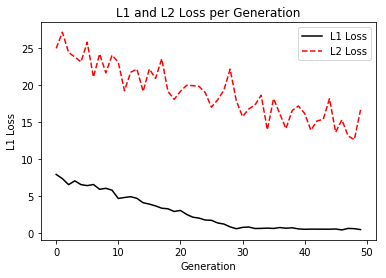

In [13]:
# Plot loss over time
plt.plot(loss_vec_l1, 'k-', label='L1 Loss')
plt.plot(loss_vec_l2, 'r--', label='L2 Loss')
plt.title('L1 and L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L1 Loss')
plt.legend(loc='upper right')
plt.show()